In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC, SVR

from google.colab import drive
drive.mount('/content/drive')
mydata_path = '/content/drive/MyDrive/Teaching/ML_Finance/Python/Data/'

Mounted at /content/drive


(0.0, 160.0)

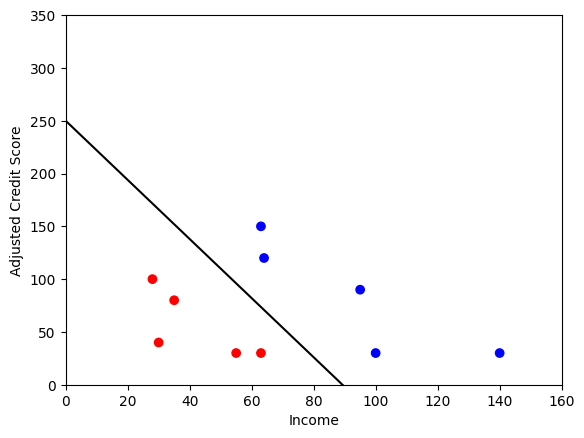

In [2]:
d = {'income': [30, 55, 63, 35, 28, 140, 100, 95, 64, 63],
        'credit': [40, 30, 30, 80, 100, 30, 30, 90, 120, 150],
        'loan': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data = d)

x1 = np.linspace(0,160,100)
y1 = 250 - 2.8*x1

colors = np.where(df['loan'] == 0, 'r', 'b')

plt.scatter(df['income'], df['credit'], c= colors)
plt.plot(x1, y1, '-', color = 'black')
plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')
plt.ylim(0,350)
plt.xlim(0,160)

In [3]:
X = df[['income', 'credit']]
Y = df['loan']

clf = SVC(kernel = 'linear', C = 0.01, tol = 1e-5)
clf.fit(X,Y)

SVC(C=0.01, kernel='linear', tol=1e-05)

In [4]:
clf.coef_[0]

array([0.05405405, 0.02162159])

(0.0, 160.0)

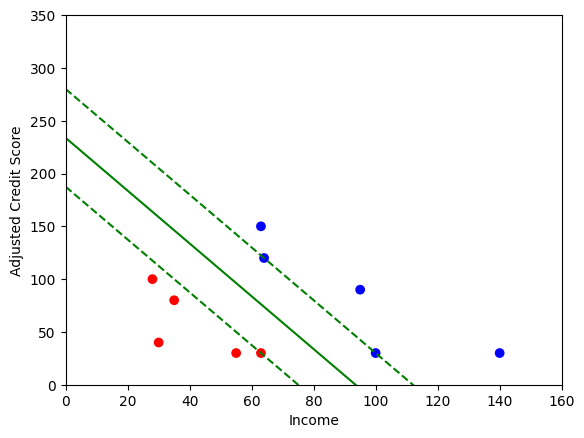

In [5]:
w = clf.coef_[0]
b = -clf.intercept_[0]

x1 = np.linspace(0,160,100)
w1 = w[0]
w2 = w[1]
bu = b+1
bd = b-1

y1 = (bu - w1*x1)/w2
y2 = (bd - w1*x1)/w2
y0 = (b - w1*x1)/w2

plt.scatter(df['income'], df['credit'], c= colors)
plt.plot(x1, y1, '--', color = 'green')
plt.plot(x1, y2, '--', color = 'green')
plt.plot(x1, y0, '-', color = 'green')
plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')
plt.ylim(0,350)
plt.xlim(0,160)

In [6]:
d1 = {'income': [30, 55, 63, 35, 28, 140, 100, 60, 64, 63],
        'credit': [40, 140, 30, 80, 100, 30, 30, 90, 120, 150],
        'loan': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]}
df1 = pd.DataFrame(data = d1)

X1 = df1[['income', 'credit']]
Y1 = df1['loan']

clf1 = SVC(kernel = 'linear', C = 0.001, tol = 1e-5)
clf1.fit(X1,Y1)

wa = clf1.coef_[0]
wb = -clf1.intercept_[0]

print(wa, wb)

wa1 = wa[0]
wa2 = wa[1]
bu1 = wb+1
bd1 = wb-1

[0.04089219 0.01315985] 3.484014869888475


(0.0, 160.0)

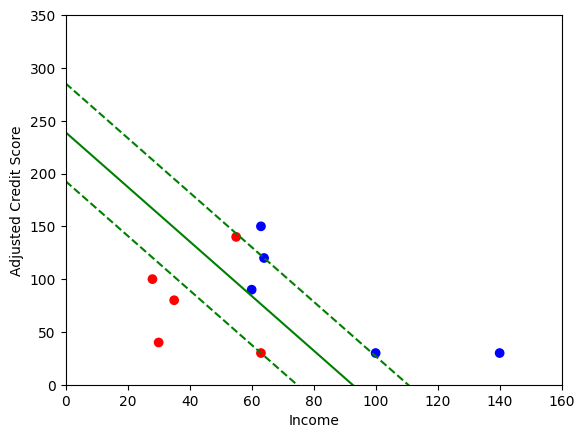

In [ ]:
y11 = (bu1 - wa1*x1)/wa2
y12 = (bd1 - wa1*x1)/wa2
y10 = (wb - wa1*x1)/wa2

colors = np.where(df1['loan'] == 0, 'r', 'b')

plt.scatter(df1['income'], df1['credit'], c= colors)
plt.plot(x1, y11, '--', color = 'green')
plt.plot(x1, y12, '--', color = 'green')
plt.plot(x1, y10, '-', color = 'green')
plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')
plt.ylim(0,350)
plt.xlim(0,160)

##### For different values of $C$ and find out the loans misclassified as well as the width of pathway

In [ ]:
results = pd.DataFrame(columns=['C','w1','w2','b','Misclassified', 'Width', 'Violations'])
Cnum = [0.01, 0.001, 0.0005, 0.0003, 0.0002]
results['C'] = Cnum
j = 0

for C in Cnum:
    clf = SVC(kernel = 'linear', C = C/2, tol = 1e-6)
    clf.fit(X1, Y1)
    S = clf.score(X1, Y1)
    w = clf.coef_[0]
    b = -clf.intercept_[0]
    p = 2/np.sqrt(w[0]**2 + w[1]**2)
    sum = 0
    for i in range(len(df1['income'])):
        if df1['loan'].iloc[i]==0:
            sum += max(w[0]*df1['income'].iloc[i] + w[1]*df1['credit'].iloc[i] - b+1,0)
        else:
            sum += max(b +1-w[0]*df1['income'].iloc[i] - w[1]*df1['credit'].iloc[i] ,0)
    results.iloc[j,1] = w[0]
    results.iloc[j,2] = w[1]
    results.iloc[j,3] = b
    results.iloc[j,4] = 100*(1-S)
    results.iloc[j,5] = p
    results.iloc[j,6] = sum

    j += 1

results

,C,w1,w2,b,Misclassified,Width,Violations
0,0.0100,0.054054,0.021622,5.054054,10.0,34.353637,2.810811
1,0.0010,0.039669,0.012231,3.333884,10.0,48.178508,3.305786
2,0.0005,0.0265,0.01,2.46125,10.0,70.61145,4.791
3,0.0003,0.018704,0.005745,1.790926,20.0,102.215343,5.787562
4,0.0002,0.01848,0.003284,1.685754,30.0,106.554267,5.909741


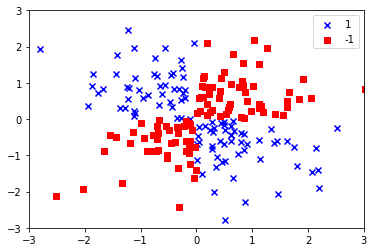

In [ ]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor ==1,1], c='b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor ==-1,1], c='r', marker = 's', label = '-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc ='best')

##### Iowa House Price Data
##### We will merge all data (training + validation + testing) into one file to investigate the relationship between house price and grlivarea

In [7]:
iowa_train = pd.read_excel(mydata_path +'IOWA_Training_Data.xlsx')
iowa_valid = pd.read_excel(mydata_path +'IOWA_Validation_Data.xlsx')
iowa_test = pd.read_excel(mydata_path +'IOWA_Test_Data.xlsx')

In [8]:
iowa = pd.concat([iowa_train, iowa_valid, iowa_test], ignore_index=True)
Xp = iowa['GrLivArea']
yp = iowa['Sale Price']

Xp2 = Xp.values.reshape(-1, 1)
yp2 = yp.values.ravel()

X_grid = np.arange(min(Xp2), max(Xp2), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))


<ipython-input-8-890651507d2a>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(Xp2), max(Xp2), 0.01)


Text(0, 0.5, 'House Price')

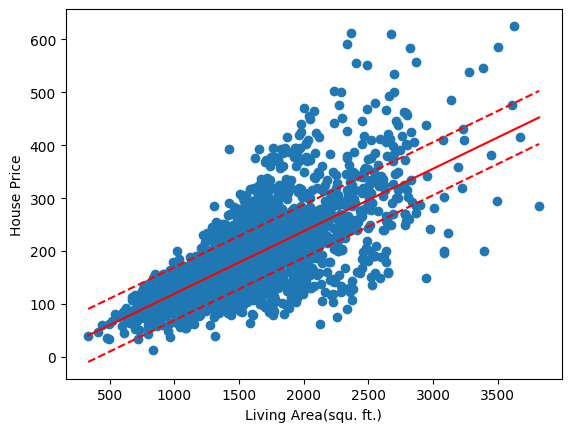

In [9]:
eps1 = 50

regr1 = SVR(kernel = 'linear', C = 0.01, tol = 1e-5, epsilon = eps1)
regr1.fit(Xp2, yp2)

plt.scatter(Xp2, yp2)
plt.plot(X_grid, regr1.predict(X_grid), '-', color = 'r')
plt.plot(X_grid, regr1.predict(X_grid)-eps1, '--' , color = 'r')
plt.plot(X_grid, regr1.predict(X_grid)+eps1, '--' , color = 'r')
plt.xlabel('Living Area(squ. ft.)')
plt.ylabel('House Price')

Text(0, 0.5, 'House Price')

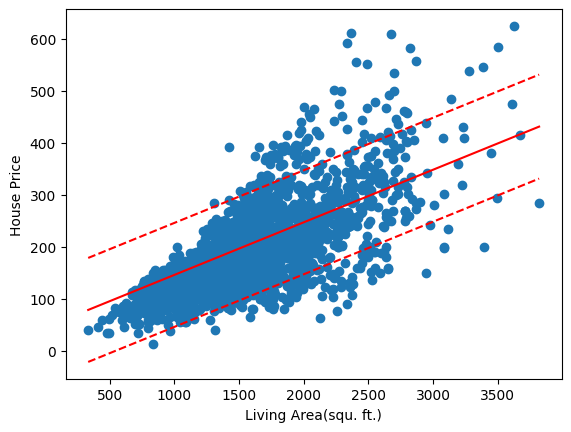

In [10]:
eps2 = 100

regr2 = SVR(kernel = 'linear', C = 0.1, tol = 1e-5, epsilon = eps2)
regr2.fit(Xp2, yp2)


plt.scatter(Xp2, yp2)
plt.plot(X_grid, regr2.predict(X_grid), '-', color = 'r')
plt.plot(X_grid, regr2.predict(X_grid)-eps2, '--' , color = 'r')
plt.plot(X_grid, regr2.predict(X_grid)+eps2, '--' , color = 'r')
plt.xlabel('Living Area(squ. ft.)')
plt.ylabel('House Price')

In [ ]:
print(regr1.coef_, regr2.coef_)
print(regr1.intercept_, regr2.intercept_)

[[0.1180203]] [[0.10113636]]
[1.44796954] [44.99090909]
